<a href="https://colab.research.google.com/github/MohammedZ666/ECGNet/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dowloading ECG data from [MIT-BIH Arrhythmia Database](https://physionet.org/content/mitdb/1.0.0/)

Important links
* https://leimao.github.io/article/Neural-Networks-Quantization/
* https://www.quora.com/What-is-the-difference-between-a-gradient-and-a-derivative
* https://towardsdatascience.com/why-gradient-descent-is-so-common-in-data-science-def3e6515c5c
* https://arxiv.org/pdf/1803.08375.pdf




In [ ]:
# !wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/
# !rm -rf mitdb
# !mkdir mitdb
# !mv  physionet.org/files/mitdb/1.0.0/* mitdb
# !rm -rf physionet.org
# !pip install wfdb
# import wfdb
# from wfdb import processing
# https://winlibs.com/

# Installing and importing dependencies

In [ ]:
!pip install tensorflow_addons

import matplotlib.pyplot as plt
from random import randint
import numpy as np
import os
import pandas as pd
from scipy.signal import butter, lfilter
from time import time
from google.colab import drive
# drive.mount('/content/gdrive')
# PATH='/content/gdrive/MyDrive/ECG_ML'
PATH = '/content/'
all_types = ['N', 'S', 'V', 'F']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 13.5 MB/s eta 0:00:00


# Concentrating heartbeats by the PT process and saving as CSV

In [ ]:
# # N includes beats originating in the sinus node (normal and bundle branch block beat types);
# # S includes supraventricular ectopic beats (SVEBs);
# # V includes ventricular ectopic beats (VEBs);
# # F includes beats that result from fusing normal and VEBs;
# # Q includes any heartbeat not in the N, S, V, or F categories, essentially the undefined heartbeats
# # as well as beats resulting from the use of a pacemaker. Lets leave this out
# # Assuming the heart beats 100 times in a minute we take 1 heart_beat == 100/60,
# # therefore taking 100/(60*2) seconds of values to the left and right of the peak


# def rdbeats(patient):
#   path = '%s/mitdb/%d'% (os.getcwd(), patient)
#   rows = pd.DataFrame()
#   try:
#     record = wfdb.rdsamp(path)[0][:,0]
#   except Exception as e :
#     print(e)
#     return pd.DataFrame()
#   ann = wfdb.rdann(path, 'atr')
#   beat_data = []

#   for i, symbol in enumerate(ann.symbol):
#     if symbol in n_beats:
#       beat_data.append(('N', ann.sample[i]))
#     elif symbol in s_beats:
#       beat_data.append(('S', ann.sample[i]))
#     elif symbol in v_beats:
#       beat_data.append(('V', ann.sample[i]))
#     elif symbol in f_beats:
#       beat_data.append(('F', ann.sample[i]))


#   for datum in beat_data:
#     i = datum[1]
#     start = i - int((samplen/2))
#     end = i + int((samplen/2))
#     if start < 0:
#       zeros = start * -1
#       beat = record[0:int(samplen/2)+i]
#       beat = np.insert(beat, 0, np.zeros(zeros))
#     elif end > (len(record)-1):
#       zeros = end - (len(record)-1)
#       beat = record[start: len(record)]
#       beat = np.concatenate((beat, np.zeros(zeros)))
#     else:
#       beat = record[start:start+samplen]

#     beat = resample(beat, resamp_to, beat_time)
#     oribeat = beat
#     beat = pt_preprocess(beat, resamp_to)
#     row = {'patient':[patient], 'beat' : np.array2string(oribeat, separator=', ')}

#     # One hot encoding the types
#     for t in all_types:
#       row[t] = [1] if t == datum[0] else [0]

#     # Adding beats
#     for i, b in enumerate(beat):
#       row[str(i)] = [b]
#     row = pd.DataFrame(row)
#     rows = pd.concat([rows,row])

#   return rows

# def resample(x, to_sample_hz, total_time):
#     new_len = int(to_sample_hz * 0.6)
#     sample_diff = x.size - new_len
#     delete_every = int(x.size/sample_diff)
#     x = np.delete(x, np.arange(0, x.size, delete_every))
#     start = True
#     for z in range(new_len - x.size):
#       if start:
#         x = np.insert(x, 0, 0)
#       else:
#         x = np.append(x, 0)
#       start = not start
#     return x


# def pt_preprocess(beat, samp_size):
#     integration_window = 15
#     low_hz = 5
#     hi_hz = 15
#     order = 1
#     filtered_beat = bandpass_filter(beat, low_hz, hi_hz, samp_size, order)
#     diffed_beat = np.ediff1d(filtered_beat)
#     sqaured_beat = diffed_beat ** 2
#     convolved_beat = np.convolve(sqaured_beat, np.ones(integration_window))
#     return convolved_beat


# def bandpass_filter(data, lowcut, highcut, signal_freq, filter_order):
#     nyquist_freq = 0.5 * signal_freq
#     low = lowcut / nyquist_freq
#     high = highcut / nyquist_freq
#     b, a = butter(filter_order, [low, high], btype="band")
#     y = lfilter(b, a, data)
#     return y

# n_beats = ['N', 'L', 'R', 'e', 'j']
# s_beats = ['A', 'a', 'J', 'S']
# v_beats = ['V', 'E']
# f_beats = ['F']
# resamp_to = 250
# beat_time = 0.6
# samplen = int(beat_time * 360)

# # if samplen%2 != 0 : samplen+=1
# df = pd.DataFrame()

# for i in range(100, 235):
#   df= pd.concat([df, rdbeats(i)], ignore_index=True)

# df.to_csv('%s/mit_bih.csv'%(PATH), index=False)

In [ ]:
!gdown "https://drive.google.com/uc?id=1-6oaGPNnMuT9xppRz6HNMZHETpzQCOw0&confirm=t&uuid=af1e3755-329a-4108-a633-9ee04916f7a7&at=AHV7M3eHzCwdgZlry-jTdzJ5vH2L:1669554255041"
PATH = "/content/"

Downloading...
From: https://drive.google.com/uc?id=1-6oaGPNnMuT9xppRz6HNMZHETpzQCOw0&confirm=t&uuid=af1e3755-329a-4108-a633-9ee04916f7a7&at=AHV7M3eHzCwdgZlry-jTdzJ5vH2L:1669554255041
To: /content/mit_bih.csv
100% 471M/471M [00:07<00:00, 63.0MB/s]


# Visualizing concentrated data for each type of beat N, S, V and F

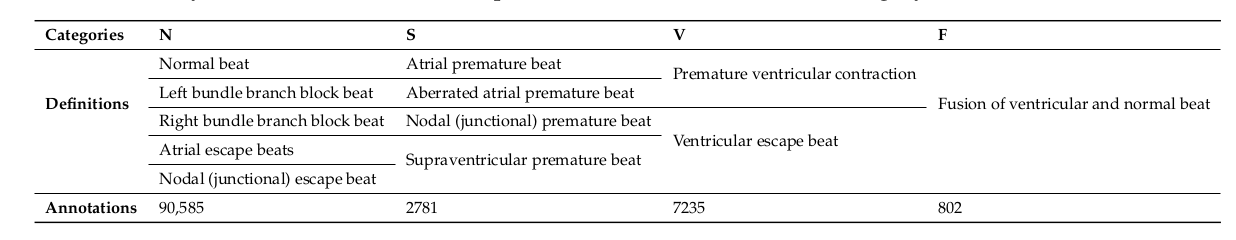


beat type N



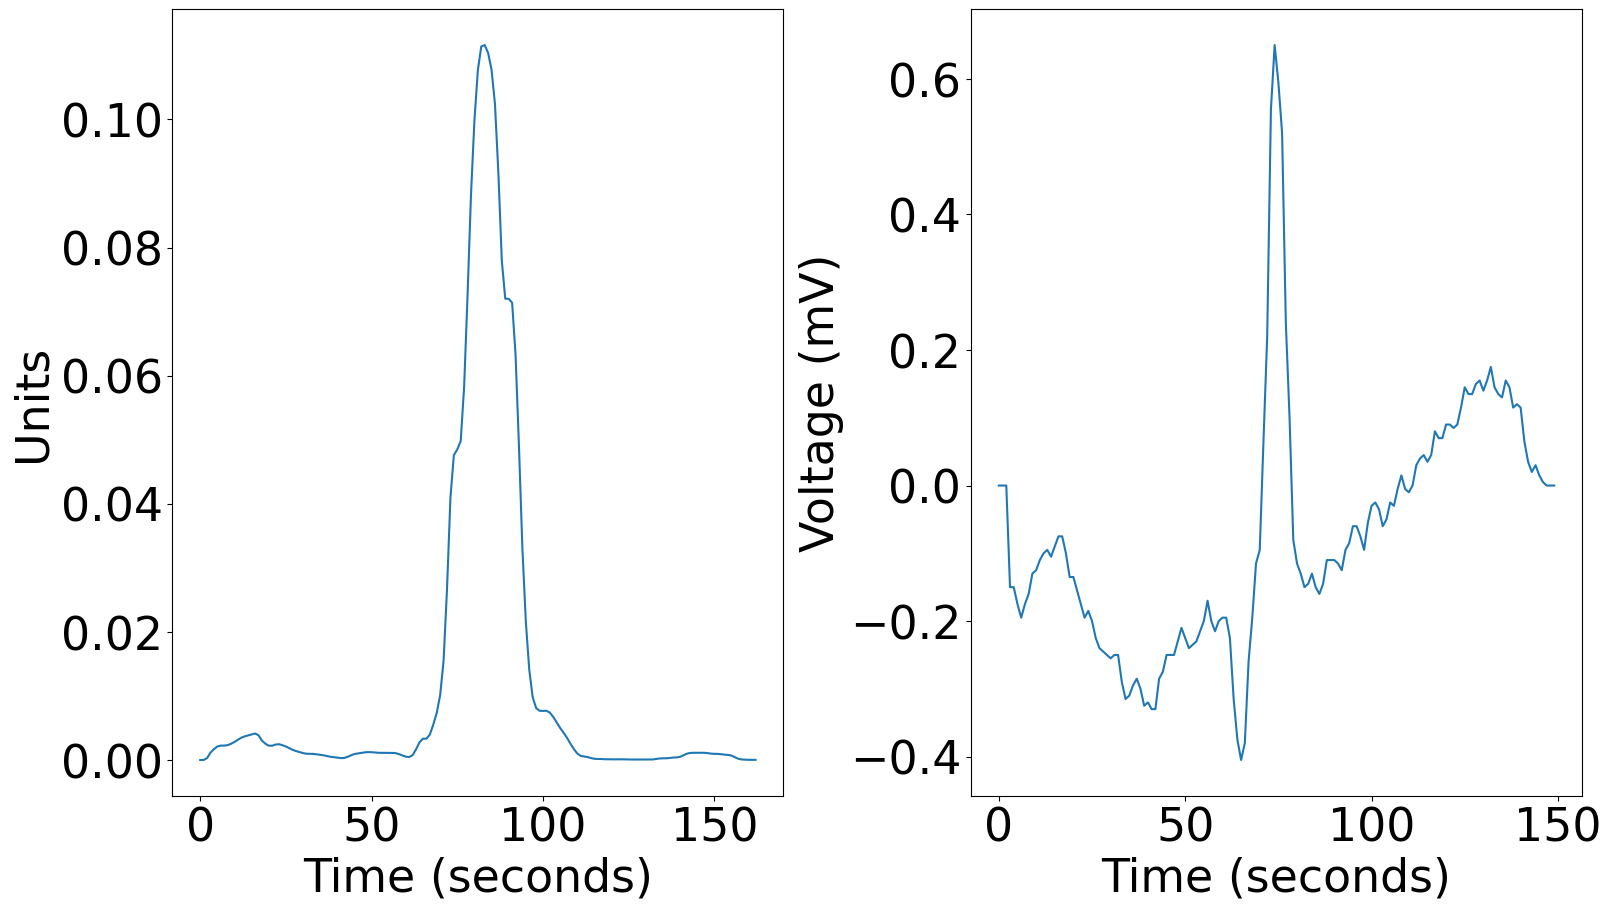


beat type S



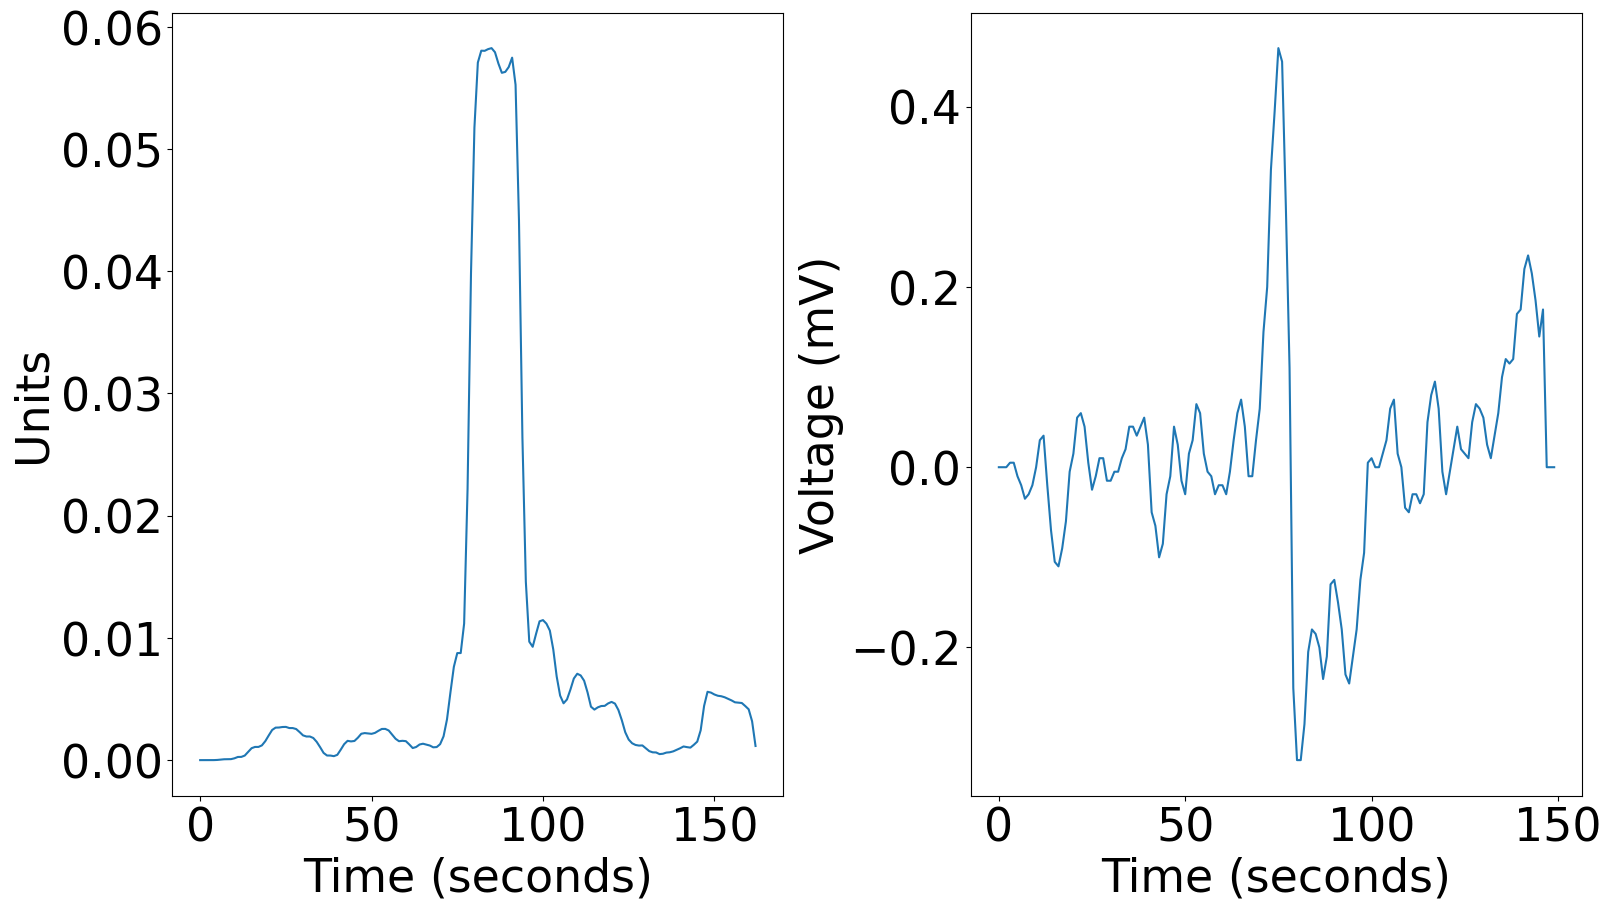


beat type V



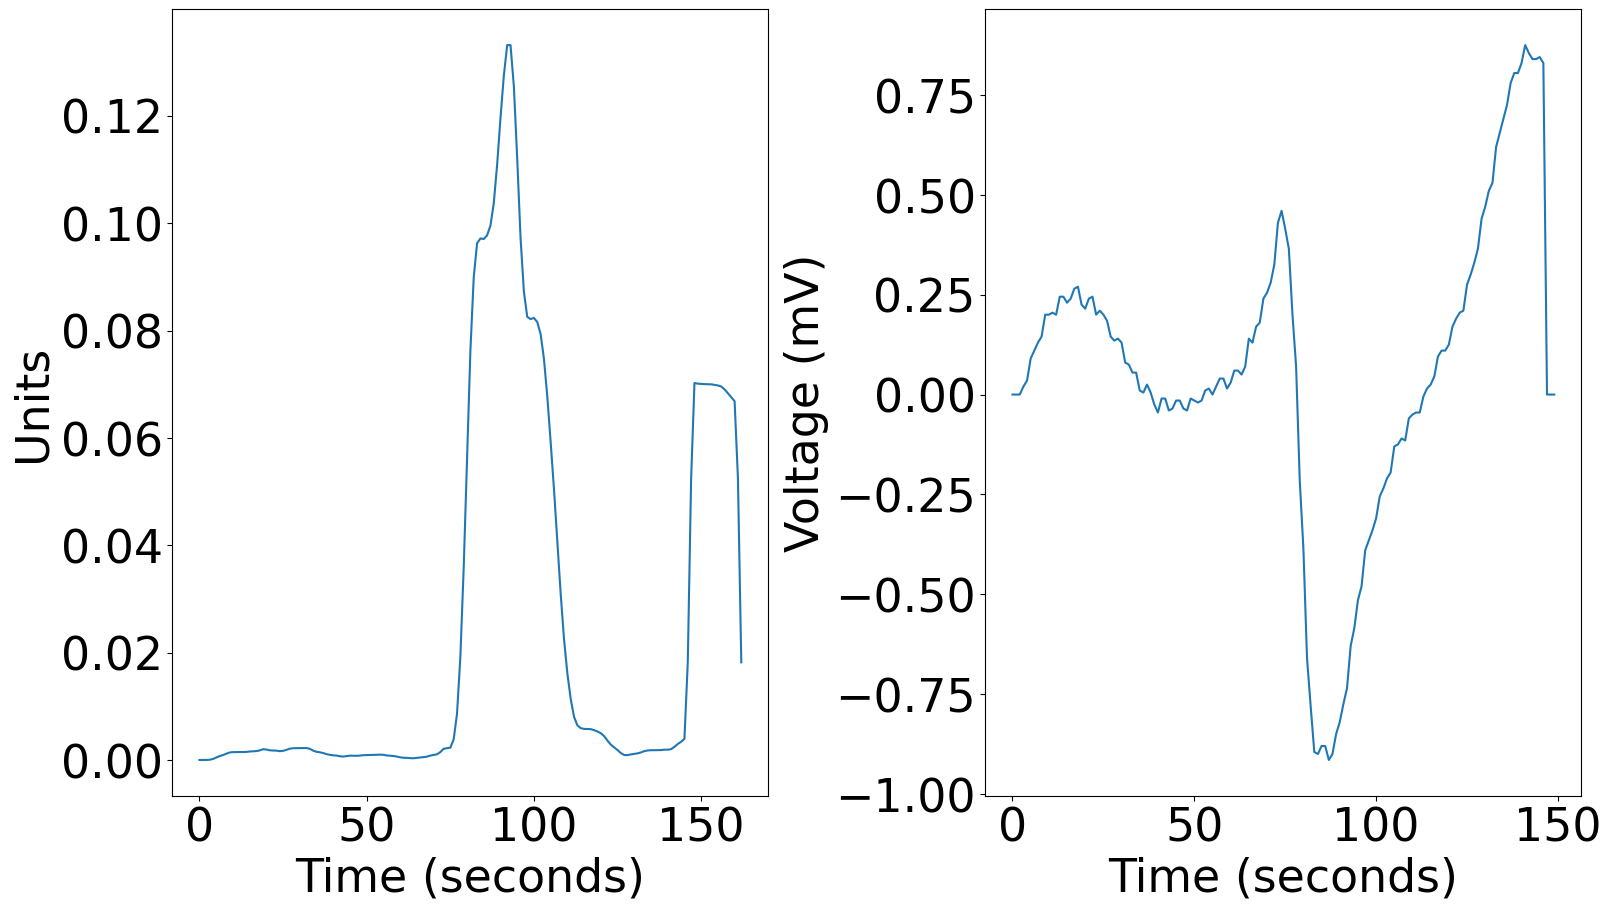


beat type F



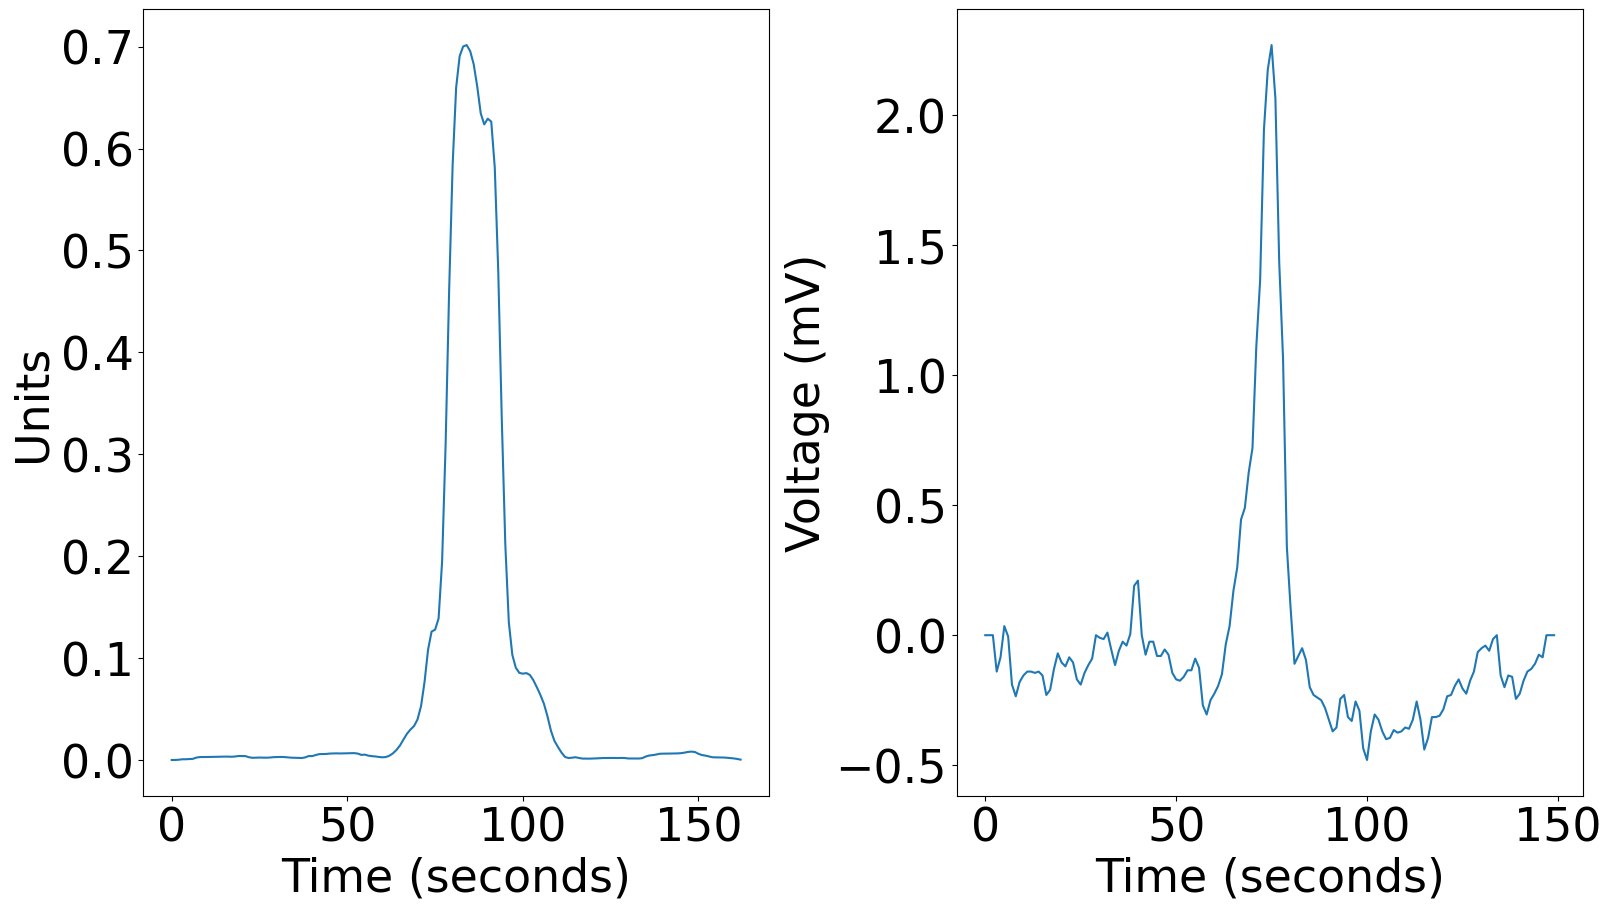

In [ ]:
# !rm -rf /content/mit_bih.csv
# !gdown --id 1-3tvbqnwQx1quxvdN_M9G4iq6afa5RuB
plt.rc('xtick', labelsize='33')    # fontsize of the tick labels
plt.rc('ytick', labelsize='33')


df = pd.read_csv('%s/mit_bih.csv'%(PATH))

for index, symbol in enumerate(all_types):
  new_df = df[df[symbol]==1]
  index = randint(0, new_df.shape[0]-1)
  oribeat =  eval((new_df.iloc[index]['beat']))
  preprocessed  = new_df.iloc[index]['0':df.columns[-1]]

  print(f"\nbeat type {symbol}\n")
  fig, axes = plt.subplots(1,2, figsize=(16,9), constrained_layout = True)
  axes[0].plot(np.arange(0, 163),preprocessed)
  axes[0].set_xlabel("Time (seconds)", size=33)
  axes[0].set_ylabel("Units", size=33)
  axes[1].plot(oribeat)
  axes[1].set_xlabel("Time (seconds)", size=33)
  axes[1].set_ylabel("Voltage (mV)", size=33)
  plt.savefig(f"{PATH}/{symbol}_beat.png")
  plt.show()




# Only keeping concetrated part of the beat

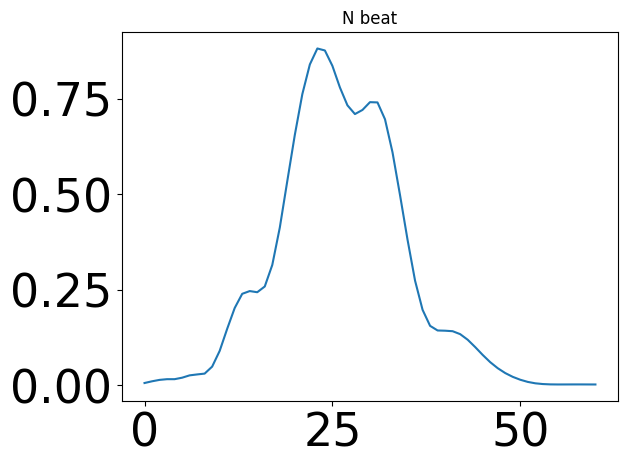

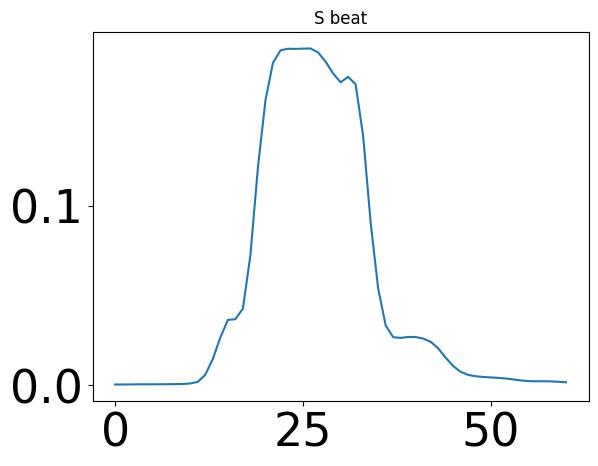

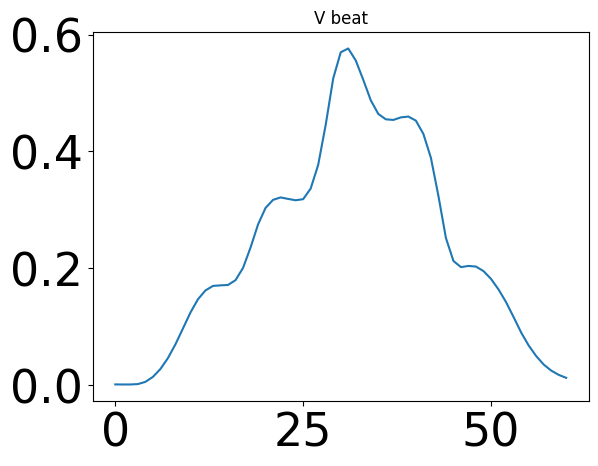

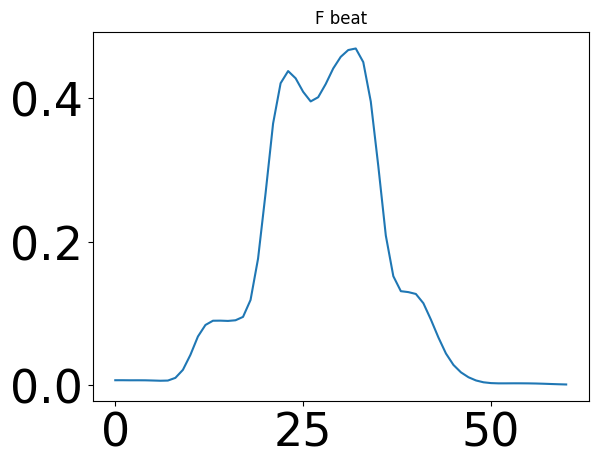

In [ ]:
start_col = '60'
end_col = '120'
cols_drop = [str(i) for i in range(0, int(start_col))] + [str(i) for i in range(int(end_col)+1, (int(df.columns[-1]) + 1))]
df = df.drop(cols_drop, axis=1)
df.columns
for index, symbol in enumerate(all_types):
  new_df = df[df[symbol]==1]
  index = randint(0, new_df.shape[0]-1)
  y =  new_df.iloc[index][start_col : df.columns[-1]].to_numpy()

  plt.plot(y)
  plt.title(label="%s beat"%symbol)
  plt.show()


# Preparing data for training

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras import Model, Sequential, models
from sklearn.model_selection import train_test_split

features =  df.loc[:, start_col : end_col].to_numpy()
labels =  np.array(df[all_types])
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.33,
                                                    stratify=labels,
                                                    random_state=42)

x_train = np.expand_dims(x_train, axis=1).astype("float32")
x_test = np.expand_dims(x_test, axis=1).astype("float32")
y_train = np.expand_dims(y_train, axis=1).astype("float32")
y_test = np.expand_dims(y_test, axis=1).astype("float32")


# x_train = x_train.astype("float32")
# y_train = y_train.astype("float32")

batch = 1024

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(batch)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch)

2.12.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11453467716290394613
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7752527202490255242
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# Designing the neural network

* Adam + MSE + last layer relu causes stagnation - for 1000 epochs and 1024 batch size
* SGD + MSE +last layer relu causes stagnation  - for 1000 epochs and 1024 batch size

* Adam + CE + last layer relu causes loss=nan
* SGD + CE +last layer relu causes loss=nan

* Adam + MSE + last layer sigmoid causes accuracy = 93.297290802001953125% - for 1000 epochs. For 10,000 epochs it gives 93.44364929199219% accuracy. Batch size was 1024.
* SGD + MSE + last layer sigmoid causes stagnation

* Adam + CE + last layer sigmoid causes accuracy = 92.983663082122802734375% - for 1000 epochs and 1024 batch size

* SGD + CE + last layer sigmoid causes stagnation - for 1000 epochs and 1024 batch size

#2+ layer
* For 1st layer 1, 4, 4 accuracy 93.4346923828125%
* For 1st layer 4 all sigmoid accuracy 96.0721664428711%
* For 1st layer 8 all sigmoid accuracy 96.6516342163086%
* For 1st layer 9 all sigmoid accuracy approx  97.00408935546875%
* For 1st layer 10 all sigmoid accuracy approx 97.20720672607422%
* For 1st layer 12 all sigmoid accuracy 97.25798034667969%

In [ ]:
import tensorflow_addons as tfa

MODEL_DIR = "%s/model.h5" % (PATH)


# input_samp, output_samp = next(train_ds.as_numpy_iterator())
input_samp, output_samp = None, None

model = Sequential([
           Dense(10, activation='sigmoid'), #14
           Dense(len(all_types), activation='softmax')
        ])

loss_object = tf.keras.losses.MeanSquaredError() # Try catergorical cross entropy
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['accuracy'])

train_loss = tf.keras.metrics.MeanSquaredError(name='train_loss')
train_accuracy = tf.metrics.CategoricalAccuracy(name="train_accuracy")
train_f1score = tfa.metrics.F1Score(name="train_f1score", num_classes=4, average='macro')


test_loss = tf.keras.metrics.MeanSquaredError(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')
test_f1score = tfa.metrics.F1Score(name="test_f1score", num_classes=4, average='macro')


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Training the network

* Quantization eqn, $\begin{align} x_q = \text{round}\big(\frac{1}{s} x - z\big) \\ \end{align}$
* Dequantization eqn, $\begin{align} x = s (x_q + z) \\ \end{align}$

### Finding scale and zero via system of two equations:
* scale, $\begin{align} s &= \frac{\beta - \alpha}{\beta_q - \alpha_q} \end{align}$
* zero, $\begin{align}z &= \frac{\alpha \beta_q - \beta \alpha_q}{\beta - \alpha} \end{align}$



In [ ]:
@tf.function
def train_step(features, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(features)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(labels, predictions)
  train_accuracy(labels, predictions)
  train_f1score(tf.squeeze(labels), tf.squeeze(predictions))


@tf.function
def test_step(features, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(features, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(labels, predictions)
  test_accuracy(labels, predictions)
  test_f1score(tf.squeeze(labels), tf.squeeze(predictions))


def save_model(model):
  model.save(MODEL_DIR)




EPOCHS = 20000

test_f1_prev = -np.inf
test_losses = []

for epoch in range(0, EPOCHS):
  # Reset the metrics at the start of the next epoch
  start_time = time()
  train_loss.reset_states()
  train_accuracy.reset_states()
  train_f1score.reset_states()

  test_loss.reset_states()
  test_accuracy.reset_states()
  test_f1score.reset_states()


  for x, y in train_ds:
    train_step(x, y)

  for x, y in test_ds:
    test_step(x, y)

  #Saving the best model
  if test_f1_prev < test_f1score.result():
    save_model(model)
    test_f1_prev = test_f1score.result()

  test_losses.append(test_loss.result())
  print(
      f'Epoch {epoch + 1}, '
      f'Loss: {train_loss.result()}, '
      f'Accuracy: {train_accuracy.result() * 100}, '
      f'F1-score: {train_f1score.result() * 100}, '
      f'Test Loss: {test_loss.result()}, '
      f'Test Accuracy: {test_accuracy.result() * 100} '
      f'Test F1-score: {test_f1score.result() * 100}, '
      f'Time: {time() - start_time} seconds'
    )


Epoch 1, Loss: 0.1442273110151291, Accuracy: 55.55375671386719, F1-score: 19.59364891052246, Test Loss: 0.09750189632177353, Test Accuracy: 89.33361053466797 Test F1-score: 23.591588973999023, Time: 21.33483076095581 seconds


# Load the best model and evaluate



33/33 [==============================] - 0s 7ms/step - loss: 0.0975 - accuracy: 0.8933
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 10)             620       
                                                                 
 dense_1 (Dense)             (None, 1, 4)              44        
                                                                 
Total params: 664
Trainable params: 664
Non-trainable params: 0
_________________________________________________________________


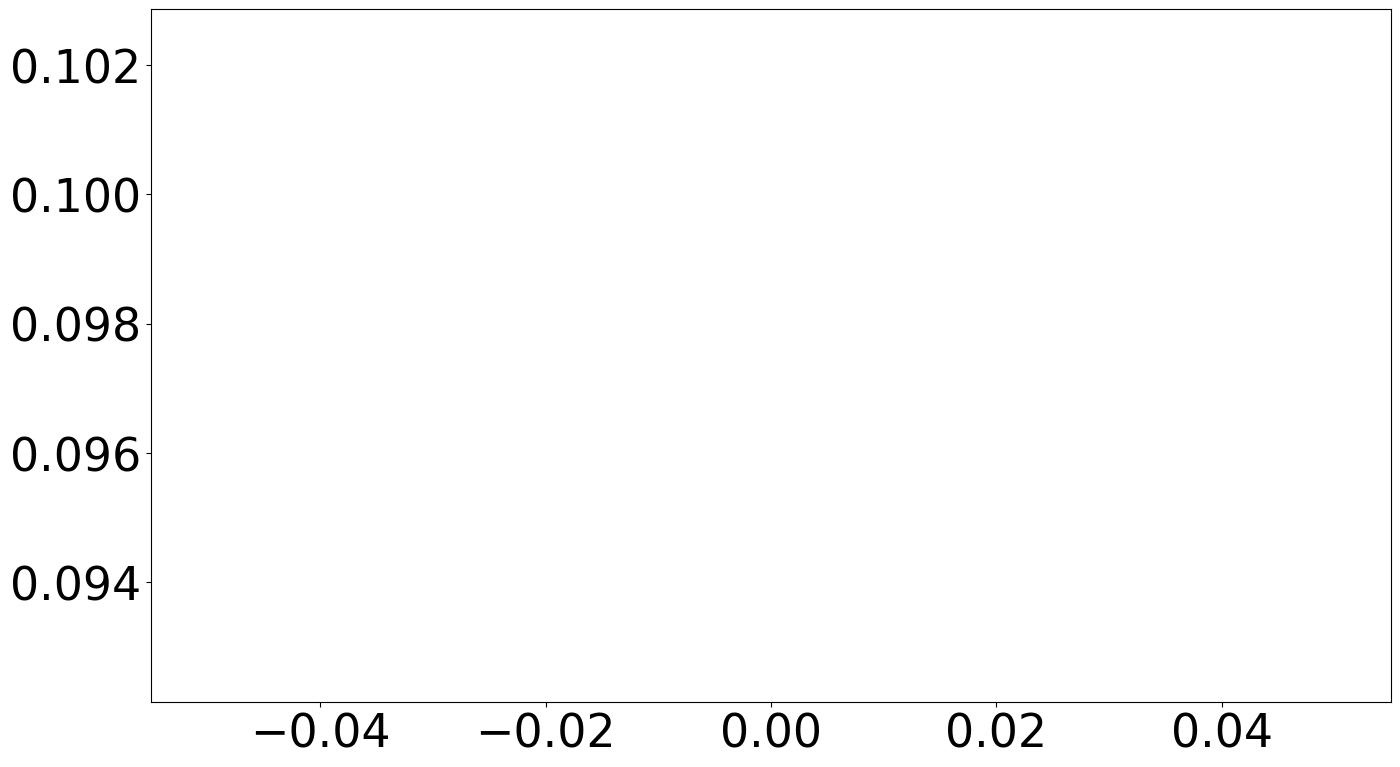

In [ ]:
model = models.load_model(MODEL_DIR)
test = model.evaluate(test_ds)
# print('Restored model, accuracy: %.60g'%(100 * acc), "%")
model.summary()

plt.rcParams["figure.figsize"] = (16,9)
plt.plot(test_losses, linewidth=6)
plt.savefig('/content/sigmoid_plus_sigmoid.png')
plt.show()





# Upload pretrained model


In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving model.h5 to model (1).h5


# Load model, scale and zero

In [ ]:
def quantize(x, scale, zero, alpha_q, beta_q):
  x =  round((x/scale) - zero)
  if x < alpha_q:
    return alpha_q
  elif x > beta_q:
    return beta_q
  return x

def check_model(model):
  max = -np.inf
  min = np.inf
  for i, v in enumerate(model.trainable_variables):
    nmax = np.amax(model.trainable_variables[i].numpy())
    max = max if max > nmax else nmax

    nmin = np.amin(model.trainable_variables[i].numpy())
    min = min if min < nmin else nmin

  alpha = -max
  beta = max

  alpha_q = -127
  beta_q = 127

  scale = (beta - alpha)/(beta_q - alpha_q)
  zero = (alpha * beta_q - beta * alpha_q) / (beta - alpha)

  # quantize = lambda x, scale=scale, zero=zero, alpha_q=alpha_q, beta_q=beta_q : round((x/scale) - zero) if x >= alpha_q and x <= beta_q else (alpha_q if x < alpha_q else beta_q)
  dequantize = lambda x_q, scale=scale, zero=zero: scale * (x_q + zero)

  weight_sample = []
  rindices = []


  for i, v in enumerate(model.trainable_variables):
    arr = model.trainable_variables[i].numpy()
    randomi = np.random.randint(0, len(arr.flatten()))
    rindices.append(randomi)
    weight_sample.append(arr.flatten()[randomi])

  loss, acc = model.evaluate(test_ds)
  print('Regular model, accuracy: %.60g'%(100 * acc), "%")
  print('Weight samples ', weight_sample)

  weight_sample = []

  for i, v in enumerate(model.trainable_variables):
    arr = model.trainable_variables[i].numpy()
    arr = np.vectorize(quantize)(arr, scale, zero, alpha_q, beta_q)
    weight_sample.append(arr.flatten()[rindices[i]])
    model.trainable_variables[i].assign(arr)

  loss, acc = model.evaluate(test_ds)
  print('Quantized model, accuracy: %.60g'%(100 * acc), "%")
  print('Weight samples ', weight_sample)



  weight_sample = []

  for i, v in enumerate(model.trainable_variables):
    arr = model.trainable_variables[i].numpy()
    arr = np.vectorize(dequantize)(arr)
    weight_sample.append(arr.flatten()[rindices[i]])
    model.trainable_variables[i].assign(arr)

  loss, acc = model.evaluate(test_ds)
  print('Dequantized model, accuracy: %.60g'%(100 * acc), "%")
  print('Weight samples = ', weight_sample)


  return scale, zero, alpha_q, beta_q, alpha, beta


MODEL_DIR = f'model.h5'
model = models.load_model(MODEL_DIR)
scale, zero, alpha_q, beta_q, alpha, beta = check_model(model)

# Calculating weight and bias size

In [ ]:
tbytes = 0
for i, l in enumerate(model.layers):
  kernel = l.weights[0].numpy()
  bias = l.weights[1].numpy()
  tbytes += kernel.nbytes
  tbytes += bias.nbytes
  print("for layer %d, kernel_bytes = %d, and bias_bytes = %d"% (i, kernel.nbytes, bias.nbytes))


print("Total bytes= %d"%tbytes)

for layer 0, kernel_bytes = 2440, and bias_bytes = 40
for layer 1, kernel_bytes = 160, and bias_bytes = 16
Total bytes= 2656


# Writing basic DNN methods for cpp implementation

In [ ]:
def matmul(mat1, mat2):
  r1= mat1.shape[0]
  c1= mat1.shape[1]
  r2= mat2.shape[0]
  c2= mat2.shape[1]
  assert c1 == r2
  res = np.zeros(shape=(r1, c2))
  for i in range(r1):
    for j in range(c2):
      for k in range(c1):
        res[i,j]+= mat1[i, k] * mat2[k, j]
  return res

def relu(x):
  return np.maximum(0,x)

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def dense(input, kernel, bias, func):
  if len(input.shape) < 2:
    input = np.array([input])
  return func(matmul(input, kernel) + bias)

corr = 0
labels = y_test
features = x_test
kernels = [l.weights[0].numpy() for l in model.layers]
biases = [l.weights[1].numpy() for l in model.layers]
for (i, y) in enumerate(labels):
  x = dense(features[i], kernels[0], biases[0], sigmoid)
  x = dense(x, kernels[1], biases[1], softmax)
  if np.argmax(y) == np.argmax(x):
    corr += 1
print("Validation accuracy %.60g"%((corr/len(labels))*100))

# Input sample selection

In [ ]:
df = pd.read_csv('%s/mit_bih.csv'%(PATH))


for i, symbol in enumerate(all_types):
  new_df = df[df[symbol]==1]
  index = randint(0, new_df.shape[0]-1)

  if i== 0:
    input_samps =  eval((new_df.iloc[index]['beat']))

  else :
    input_samps = np.vstack([input_samps, eval((new_df.iloc[index]['beat']))])

input_samps

array([[ 0.   ,  0.   ,  0.   , -0.24 , -0.215, -0.17 , -0.165, -0.155,
        -0.14 , -0.11 , -0.13 , -0.16 , -0.17 , -0.19 , -0.215, -0.215,
        -0.235, -0.28 , -0.32 , -0.37 , -0.385, -0.42 , -0.435, -0.485,
        -0.5  , -0.505, -0.515, -0.525, -0.535, -0.555, -0.55 , -0.525,
        -0.52 , -0.495, -0.5  , -0.44 , -0.405, -0.325, -0.3  , -0.275,
        -0.26 , -0.23 , -0.215, -0.22 , -0.23 , -0.315, -0.335, -0.415,
        -0.47 , -0.525, -0.565, -0.605, -0.605, -0.595, -0.585, -0.585,
        -0.585, -0.58 , -0.585, -0.6  , -0.61 , -0.6  , -0.61 , -0.59 ,
        -0.58 , -0.58 , -0.6  , -0.65 , -0.625, -0.385, -0.17 ,  0.45 ,
         0.83 ,  1.61 ,  1.91 ,  1.99 ,  1.765,  0.975,  0.54 , -0.23 ,
        -0.505, -0.97 , -1.125, -1.19 , -1.09 , -0.865, -0.78 , -0.77 ,
        -0.8  , -0.875, -0.9  , -0.9  , -0.885, -0.905, -0.905, -0.93 ,
        -0.93 , -0.92 , -0.935, -0.955, -0.98 , -0.995, -0.985, -0.97 ,
        -0.955, -0.96 , -0.965, -0.975, -0.98 , -0.945, -0.915, 

# Creating cpp header file with weights and biases

In [ ]:
header  = "#ifndef MODEL_H\n"
header += "#define MODEL_H\n\n"
for i, layer in enumerate(model.layers):
  kernel = layer.weights[0].numpy()
  bias = layer.weights[1].numpy()

  if len(kernel.shape)<2:
    kernel = kernel.reshape(1, kernel.shape[0])
  if len(bias.shape)<2:
    bias = bias.reshape(1, bias.shape[0])

  kernel_lens = []

  # Not saving bias lens as they are the same as matmul(input, kernel) matrix after the reshaping above
  for j, shape in enumerate(kernel.shape):
    string = "LAYER%d_KERNEL_DIM%d"%(i, j)
    kernel_lens.append(string)

  header += "int8_t LAYER%d_KERNEL []{"%(i)

  for k in kernel.flatten():
    header += "%d,"%(k)

  header = header[:-1] #removing the last comma
  header+="};\n"

  header += "int8_t LAYER%d_BIAS []{"%(i)

  for m in bias.flatten():
    header += "%d,"%(m)

  header=header[:-1] #removing the last comma
  header+="};\n\n"

for i, sym in enumerate(all_types):
  #Adding sample in
  header+= f"float SAMPLE_INPUT_{sym}"+"[]={"
  for i in input_samps[i].flatten():
    header+="%f,"%i
  header=header[:-1]
  header+="};\n"


header += """
float dequantize(int8_t x_q)
{
    return %ff * x_q;
}

"""%(scale)

header += "#endif"
print(header)
f = open("%s/model.h"% (PATH), "w")
f.write(header)
f.close()
# https://www.geeksforgeeks.org/pass-2d-array-parameter-c/
# https://stackoverflow.com/questions/15283523/reshaping-a-1-d-array-to-a-multidimensional-array

#ifndef MODEL_H
#define MODEL_H

int8_t LAYER0_KERNEL []{-65,51,29,11,-25,22,4,-7,51,17,-4,17,-41,24,65,-63,-39,-13,-4,5,-13,35,37,-42,31,46,-8,-21,18,-2,37,-31,30,-4,25,17,-48,31,27,52,-48,-33,27,18,19,18,42,53,-12,51,-40,15,47,-25,41,26,-23,-35,-20,-31,-64,-15,40,-60,-28,-44,-21,39,54,46,-56,55,-20,-27,-29,-39,-47,14,-6,8,-45,49,42,27,19,21,27,-6,18,49,13,50,33,3,-29,-64,-31,-56,1,60,33,32,-36,0,44,11,-61,22,58,47,-1,-26,-68,21,22,-11,-57,33,-40,31,15,7,-52,9,-9,-67,-11,-1,60,-17,-10,-28,41,-28,6,-28,10,35,53,0,-47,-43,-42,-62,68,-47,-53,45,10,-34,32,69,-37,-14,23,25,-26,-40,24,-47,12,-7,-21,-36,50,-38,-42,-28,27,-45,8,43,28,27,59,-2,36,54,8,-35,-21,57,-1,35,-5,-33,-53,-12,13,-44,-8,7,19,39,-9,46,2,-11,21,-69,-12,27,12,-42,54,-46,-30,18,5,-27,25,24,4,-40,-2,-35,-10,25,71,-68,-27,-5,-14,0,-13,-14,-42,6,53,-10,-49,63,-31,-56,17,-16,8,67,49,-64,40,-37,14,-51,37,-9,-25,17,32,33,38,-3,-4,15,-1,19,-3,22,15,-15,-56,-4,-17,8,68,12,-14,70,9,46,-8,50,1,43,57,-55,-15,32,25,1,-57,32,34,28,38,-63

# Model comparision

In [ ]:
def check_model(model):
  max = -np.inf
  min = np.inf
  for i, v in enumerate(model.trainable_variables):
    nmax = np.amax(model.trainable_variables[i].numpy())
    max = max if max > nmax else nmax

    nmin = np.amin(model.trainable_variables[i].numpy())
    min = min if min < nmin else nmin

  alpha = -max
  beta = max

  alpha_q = -127
  beta_q = 127

  scale = (beta - alpha)/(beta_q - alpha_q)
  zero = (alpha * beta_q - beta * alpha_q) / (beta - alpha)

  quantize = lambda x, scale=scale, zero=zero, alpha_q=alpha_q, beta_q=beta_q : round((x/scale) - zero) if x >= alpha_q and x <= beta_q else (alpha_q if x < alpha_q else beta_q)
  dequantize = lambda x_q, scale=scale, zero=zero: scale * (x_q + zero)

  weight_sample = []
  rindices = []


  for i, v in enumerate(model.trainable_variables):
    arr = model.trainable_variables[i].numpy()
    randomi = np.random.randint(0, len(arr.flatten()))
    rindices.append(randomi)
    weight_sample.append(arr.flatten()[randomi])

  loss, acc = model.evaluate(test_ds)
  print('Regular model, accuracy: %.60g'%(100 * acc), "%")
  print('Weight samples ', [round(j,2) for j in weight_sample])

  weight_sample = []

  for i, v in enumerate(model.trainable_variables):
    arr = model.trainable_variables[i].numpy()
    arr = np.vectorize(quantize)(arr)
    weight_sample.append(arr.flatten()[rindices[i]])
    model.trainable_variables[i].assign(arr)

  loss, acc = model.evaluate(test_ds)
  print('Quantized model, accuracy: %.60g'%(100 * acc), "%")
  print('Weight samples ', weight_sample)

  weight_sample = []

  for i, v in enumerate(model.trainable_variables):
    arr = model.trainable_variables[i].numpy()
    arr = np.vectorize(dequantize)(arr)
    weight_sample.append(arr.flatten()[rindices[i]])
    model.trainable_variables[i].assign(arr)

  loss, acc = model.evaluate(test_ds)
  print('Dequantized model, accuracy: %.60g'%(100 * acc), "%")
  print('Weight samples = ', [round(j,2) for j in weight_sample])
  return scale, zero, alpha_q, beta_q, alpha, beta


model_names = ['sigmoid_plus_sigmoid', 'relu_plus_sigmoid' , 'relu_plus_softmax', 'sigmoid_plus_softmax']

! mkdir model_viz
for name in model_names:
  try:
    MODEL_DIR = f'/content/{name}.h5'
    print(f'\n\nChecking {name}...')

    # model = models.load_model(MODEL_DIR)
    # scale, zero, alpha_q, beta_q, alpha, beta = check_model(model)

    model = models.load_model(MODEL_DIR)
    scale, zero, alpha_q, beta_q, alpha, beta = check_model(model)
    print(alpha,beta, alpha_q, beta_q, scale)
    # tf.keras.utils.plot_model(
    # to_file=f'/content/model_viz/model_{name}.png',
    # model = model,
    # show_shapes=True,
    # show_dtype=True,
    # show_layer_names=True,
    # rankdir='TB',
    # expand_nested=True,
    # dpi=600,
    # layer_range=None,
    # show_layer_activations=True
    # )
  except:
    pass

# print(scale, zero, alpha_q, beta_q, alpha, beta)



Checking sigmoid_plus_sigmoid...


Checking relu_plus_sigmoid...


Checking relu_plus_softmax...


Checking sigmoid_plus_softmax...


 # Output tables of classification metrics in latex per model

In [ ]:
from sklearn.metrics import classification_report

def quantize(model):

  scale = (beta - alpha)/(beta_q - alpha_q)
  zero = (alpha * beta_q - beta * alpha_q) / (beta - alpha)

  quantize = lambda x, scale=scale, zero=zero, alpha_q=alpha_q, beta_q=beta_q : round((x/scale) - zero) if x >= alpha_q and x <= beta_q else (alpha_q if x < alpha_q else beta_q)
  dequantize = lambda x_q, scale=scale, zero=zero: scale * (x_q + zero)

  for i, v in enumerate(model.trainable_variables):
    arr = model.trainable_variables[i].numpy()
    arr = np.vectorize(quantize)(arr)
    model.trainable_variables[i].assign(arr)

  return model

def dequantize(model):


  scale = (beta - alpha)/(beta_q - alpha_q)
  zero = (alpha * beta_q - beta * alpha_q) / (beta - alpha)

  quantize = lambda x, scale=scale, zero=zero, alpha_q=alpha_q, beta_q=beta_q : round((x/scale) - zero) if x >= alpha_q and x <= beta_q else (alpha_q if x < alpha_q else beta_q)
  dequantize = lambda x_q, scale=scale, zero=zero: scale * (x_q + zero)

  for i, v in enumerate(model.trainable_variables):
    arr = model.trainable_variables[i].numpy()
    arr = np.vectorize(dequantize)(arr)
    model.trainable_variables[i].assign(arr)

  return model


def latex_with_lines(df, *args, **kwargs):
  kwargs['column_format'] = '|'.join([''] + ['c'] * df.index.nlevels
                                          + ['c'] * df.shape[1] + [''])
  res = df.to_latex(*args, **kwargs)
  for r in ['\\toprule', '\\midrule', '\\bottomrule']:
    if r == '\\bottomrule':
      res = res.replace(r, '')
    else:
      res = res.replace(r, '\\hline')

  res = res.replace('\\\\\n', '\\\\ \n\\hline\n')
  res = """\\begin{table}[htb]
  \\Large
  \\caption{}
  \\resizebox{\columnwidth}{!}{
  \\renewcommand{\\arraystretch}{3}
  """ + res + """
      }
  \\end{table}
  """

  return res



for name in model_names:
  MODEL_DIR = f'/content/{name}.h5'
  model = models.load_model(MODEL_DIR)
  print(name)
  y_preds = model.predict(x_test, batch_size=batch, verbose=1)
  y_preds = np.argmax(y_preds, axis=2)
  y_test_t = np.argmax(y_test, axis=2)
  report = classification_report(y_test_t, y_preds, target_names = all_types,output_dict=True)
  report = pd.DataFrame.from_dict(report)
  print(latex_with_lines(report))






OSError: ignored

# ROC Curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

y_preds = model.predict(x_test, batch_size=batch, verbose=1)

RocCurveDisplay.from_predictions(
    y_test[:, 0],
    y_preds[:, 0],
    name=f"N vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

# Quantization aware training

In [ ]:
# !pip install -q tensorflow-model-optimization

# import tensorflow_model_optimization as tfmot

# quantize_model = tfmot.quantization.keras.quantize_model

# # q_aware stands for for quantization aware.
# model = quantize_model(model)

# # `quantize_model` requires a recompile.
# model.compile(optimizer=optimizer,
#               loss=loss_object,
#               metrics=['accuracy'])

# model.fit(
#       train_ds,
#       epochs = 5,
#       verbose = 1,
#       validation_data = test_ds)
# print(model.summary())

In [ ]:
# import pathlib
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# # converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# # converter.experimental_new_converter =True
# # converter.allow_custom_ops=True
# #converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# #converter.target_spec.supported_types = [tf.float16]
# tflite_model = converter.convert()
# tflite_model_dir = '/content/model_lite.tflite'
# tflite_model_file = pathlib.Path(tflite_model_dir)
# size = tflite_model_file.write_bytes(tflite_model)
# print('%s KB'% (size/(10**3)))

In [ ]:
# import numpy as np
# # Load TFLite model and allocate tensors.
# TFLITE_MODEL_FILE = '/tmp/model1.tflite'
# interpreter = tf.lite.Interpreter(model_path=tflite_model_dir)
# interpreter.allocate_tensors()
# print(interpreter.get_input_details())
# input_index = interpreter.get_input_details()[0]["index"]
# output_index = interpreter.get_output_details()[0]["index"]
# predictions = []
# validation_gen = test_ds.as_numpy_iterator()
# batch = next(validation_gen,None)

# while (batch!=None):
#   for i in range(len(batch[0])):
#     img = batch[0][i]
#     img = np.expand_dims(img, axis=0).astype(np.float32)
#     label = batch[1][i]
#     interpreter.set_tensor(input_index, img)
#     interpreter.invoke()
#     output = interpreter.get_tensor(output_index)
#     predictions.append((np.argmax(output[0]) == np.argmax(label)))
#   batch = next(validation_gen,None)
# print("%s out of %d was correct" % (predictions.count(True), len(predictions)))
